In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#1.1
df = pd.read_csv("bank_marketing_part1_Data-1.csv")

In [4]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.duplicated().sum()

0

In [115]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [10]:
print("df_quantile(25%):",df.quantile(q=0.25))  # Prints the value below which 25% of the data lies

df_quantile(25%): spending                        12.27000
advance_payments                13.45000
probability_of_full_payment      0.85690
current_balance                  5.26225
credit_limit                     2.94400
min_payment_amt                  2.56150
max_spent_in_single_shopping     5.04500
Name: 0.25, dtype: float64


In [11]:
print("df_quantile(50%):",df.quantile(q=0.50))  # Prints the value below which 50% of the data lies

df_quantile(50%): spending                        14.35500
advance_payments                14.32000
probability_of_full_payment      0.87345
current_balance                  5.52350
credit_limit                     3.23700
min_payment_amt                  3.59900
max_spent_in_single_shopping     5.22300
Name: 0.5, dtype: float64


In [12]:
print("df_quantile(75%):",df.quantile(q=0.75))   # Prints the value below which 75% of the data lies

df_quantile(75%): spending                        17.305000
advance_payments                15.715000
probability_of_full_payment      0.887775
current_balance                  5.979750
credit_limit                     3.561750
min_payment_amt                  4.768750
max_spent_in_single_shopping     5.877000
Name: 0.75, dtype: float64


In [13]:
#the above output represents the IQR values for all the attributed.
df.quantile(0.75) - df.quantile(0.25)

spending                        5.035000
advance_payments                2.265000
probability_of_full_payment     0.030875
current_balance                 0.717500
credit_limit                    0.617750
min_payment_amt                 2.207250
max_spent_in_single_shopping    0.832000
dtype: float64

In [14]:
#the above represents the difference between the highest value and lowest values for all individual attributes
print(df.max() - df.min())

spending                        10.5900
advance_payments                 4.8400
probability_of_full_payment      0.1102
current_balance                  1.7760
credit_limit                     1.4030
min_payment_amt                  7.6909
max_spent_in_single_shopping     2.0310
dtype: float64


In [15]:
df.cov() # Prints the covariance of each attribute against every other attribute

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,8.466351,3.778443,0.041823,1.224704,1.066911,-1.004356,1.235133
advance_payments,3.778443,1.705528,0.016332,0.562666,0.466065,-0.426766,0.571753
probability_of_full_payment,0.041823,0.016332,0.000558,0.003852,0.006798,-0.011777,0.002634
current_balance,1.224704,0.562666,0.003852,0.196305,0.143992,-0.114290,0.203125
credit_limit,1.066911,0.466065,0.006798,0.143992,0.142668,-0.146543,0.139068
min_payment_amt,-1.004356,-0.426766,-0.011777,-0.114290,-0.146543,2.260684,-0.008187
max_spent_in_single_shopping,1.235133,0.571753,0.002634,0.203125,0.139068,-0.008187,0.241553


In [16]:
df.corr()  # prints the correlation coefficient between every pair of attributes

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


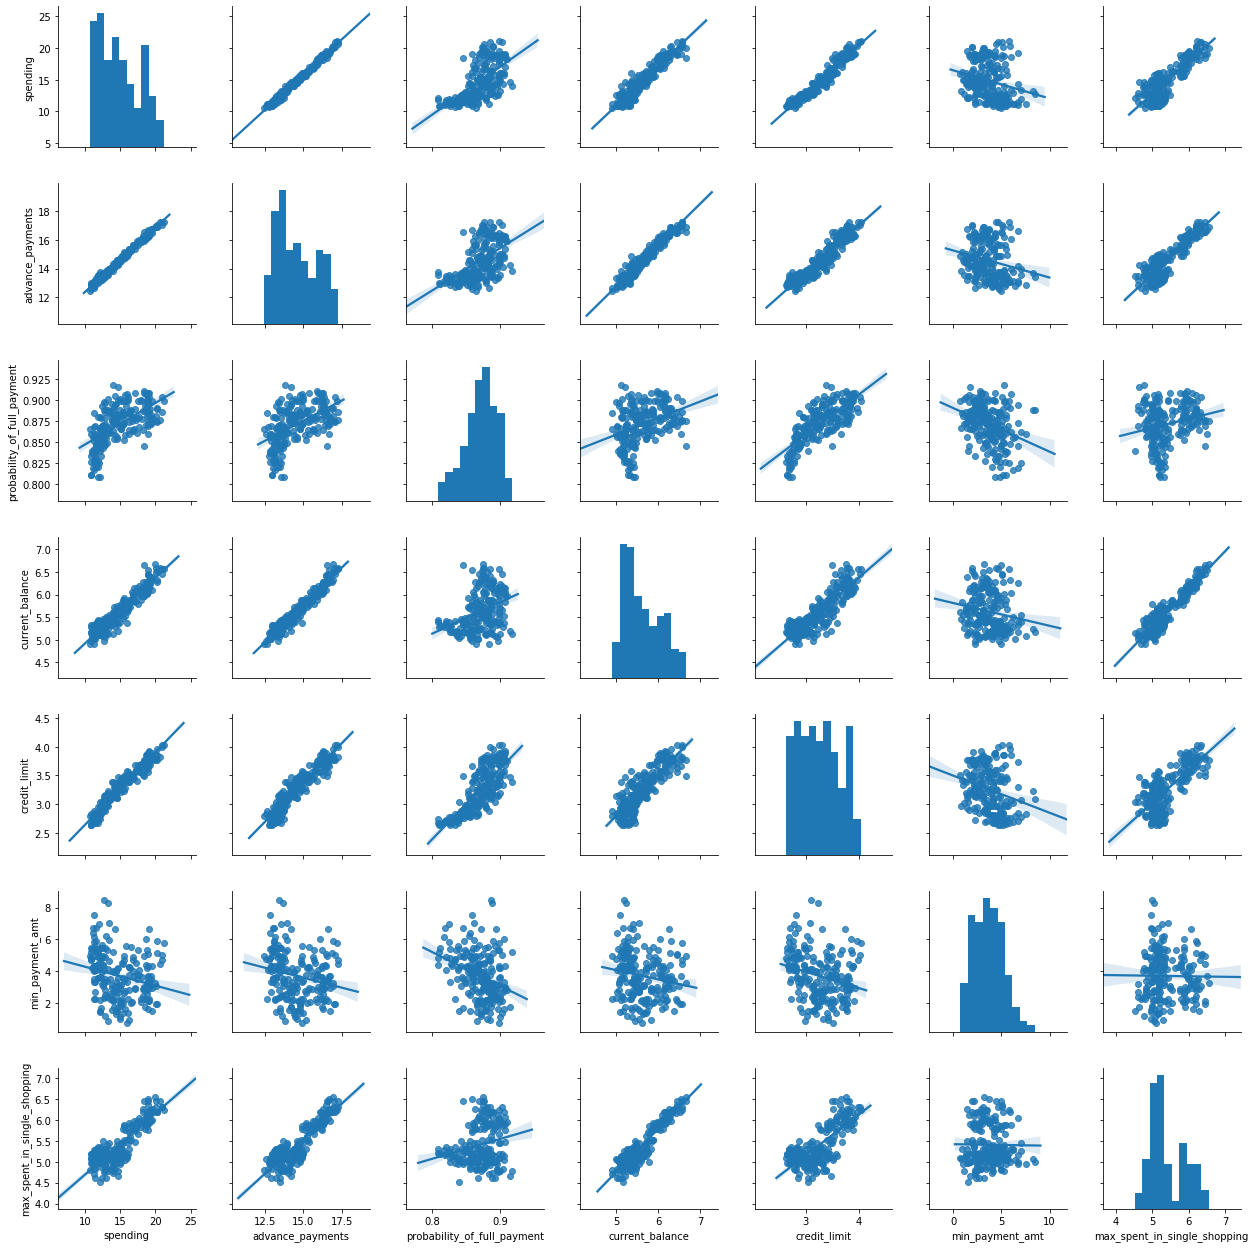

In [17]:
sns.pairplot(df, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

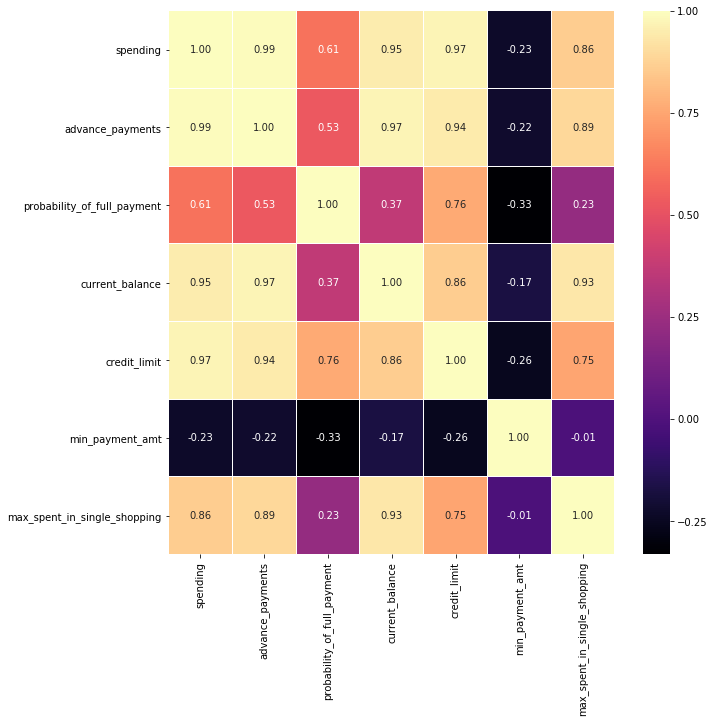

In [18]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

In [41]:
df.skew()   # to measure the skeweness of every attribute

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [19]:
#1.2
from sklearn.preprocessing import StandardScaler

In [20]:
X = StandardScaler()

In [21]:
scaled_df = X.fit_transform(df)

In [22]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [23]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [24]:
#1.3
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
wardlink = linkage(df, method = 'ward')

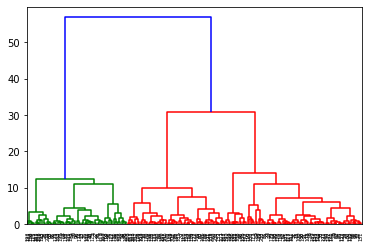

In [26]:
dend = dendrogram(wardlink)

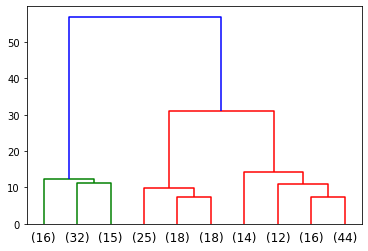

In [27]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [28]:
#1.4
wss=[]

In [29]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [30]:
wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.301721277542,
 326.53057813155976,
 289.2201964988712,
 263.5084204019588,
 239.91744118551287,
 222.51271082015415,
 208.10735185286126]

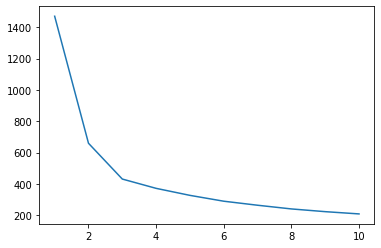

In [31]:
plt.plot(range(1,11), wss)

In [32]:
#the optimum number of clusters are 3

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [36]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [37]:
silhouette_score(scaled_df,labels)

0.4007270552751299

In [38]:
sil_width = silhouette_samples(scaled_df,labels)

In [39]:
silhouette_samples(scaled_df,labels).min()

0.002713089347678533

In [40]:
scaled_df["Clus_kmeans"] = labels
scaled_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,0
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,2
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,0
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,1
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,0


In [41]:
#1.5
clust_profile=scaled_df
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=scaled_df.Clus_kmeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans,,,,,,,,
0,1.256682,1.261966,0.560464,1.237883,1.164852,-0.045219,1.292308,67
1,-1.030253,-1.006649,-0.964905,-0.897685,-1.085583,0.694804,-0.624809,72
2,-0.141119,-0.170043,0.449606,-0.257814,0.001647,-0.661919,-0.585893,71


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

In [43]:
#2.1
data=pd.read_csv('insurance_part2_data-2.csv')

In [44]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product_Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [46]:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product_Name    0
Destination     0
dtype: int64

In [47]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [48]:
print('Agency_Code \n',data.Agency_Code.value_counts())
print('\n')
print('Type \n',data.Type.value_counts())
print('\n')
print('Claimed \n',data.Claimed.value_counts())
print('\n')
print('Channel \n',data.Channel.value_counts())
print('\n')
print('Product_Name \n',data.Product_Name.value_counts())
print('\n')
print('Destination \n',data.Destination.value_counts())

Agency_Code 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Channel 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Product_Name 
 Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product_Name, dtype: int64


Destination 
 ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


In [49]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product_Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [50]:
print('Agency_Code \n',data.Agency_Code.value_counts())
print('\n')
print('Type \n',data.Type.value_counts())
print('\n')
print('Claimed \n',data.Claimed.value_counts())
print('\n')
print('Channel \n',data.Channel.value_counts())
print('\n')
print('Product_Name \n',data.Product_Name.value_counts())
print('\n')
print('Destination \n',data.Destination.value_counts())

Agency_Code 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1837
0    1163
Name: Type, dtype: int64


Claimed 
 0    2076
1     924
Name: Claimed, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


Product_Name 
 2    1136
1     678
0     650
4     427
3     109
Name: Product_Name, dtype: int64


Destination 
 0    2465
1     320
2     215
Name: Destination, dtype: int64


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null int64
Sales           3000 non-null float64
Product_Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.4 KB


In [52]:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product_Name    0
Destination     0
dtype: int64

In [53]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Agency_Code,3000.0,1.306333,0.994060,0.0,0.0,2.00,2.000,3.00
Type,3000.0,0.612333,0.487299,0.0,0.0,1.00,1.000,1.00
Claimed,3000.0,0.308000,0.461744,0.0,0.0,0.00,1.000,1.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000.0,0.984667,0.122895,0.0,1.0,1.00,1.000,1.00
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00
Product_Name,3000.0,1.661667,1.258726,0.0,1.0,2.00,2.000,4.00
Destination,3000.0,0.250000,0.575277,0.0,0.0,0.00,0.000,2.00


In [54]:
#2.2
X = data.drop(["Claimed"] , axis=1)
y = data.pop("Claimed")

In [55]:
# splitting data into training and test set for independent attributes

X_train_rf, X_test_rf, train_labels_rf, test_labels_rf = train_test_split(X, y, test_size=.30, random_state=1)


In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [3, 4, 6],
    'min_samples_leaf': [50, 100, 150],
    'min_samples_split': [100, 150, 200],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [57]:
grid_search_rf.fit(X_train_rf, train_labels_rf)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [58]:
grid_search_rf.best_params_

{'max_depth': 7,
 'max_features': 3,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [59]:
best_grid_rf = grid_search_rf.best_estimator_

In [60]:
best_grid_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=301,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
ytrain_predict_rf = best_grid_rf.predict(X_train_rf)
ytest_predict_rf = best_grid_rf.predict(X_test_rf)

In [116]:
ytrain_predict_rf

array([0, 0, 1, ..., 0, 0, 1], dtype=int8)

In [117]:
ytest_predict_rf

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [62]:
from sklearn.metrics import confusion_matrix,classification_report

In [63]:
print(classification_report(train_labels_rf,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1471
           1       0.70      0.51      0.59       629

    accuracy                           0.79      2100
   macro avg       0.76      0.71      0.72      2100
weighted avg       0.78      0.79      0.78      2100



In [64]:
print(classification_report(test_labels_rf,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       605
           1       0.72      0.40      0.52       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.68       900
weighted avg       0.75      0.75      0.73       900



In [65]:
X_train_dt, X_test_dt, train_labels_dt, test_labels_dt = train_test_split(X, y, test_size=.30, random_state=1)

In [66]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [67]:
dt_model.fit(X_train_dt, train_labels_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_File = open('d:\Insurance_File','w')
dot_data = tree.export_graphviz(dt_model, out_file=Insurance_File, feature_names = list(X_train_dt), class_names = list(train_char_label))

Insurance_File.close()

In [69]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train_dt.columns))

                   Imp
Age           0.176348
Agency_Code   0.194797
Type          0.002329
Commision     0.093175
Channel       0.007262
Duration      0.263249
Sales         0.199095
Product_Name  0.041322
Destination   0.022423


In [70]:
y_predict_dt = dt_model.predict(X_test_dt)

In [71]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 13,min_samples_leaf=100,min_samples_split=200)
reg_dt_model.fit(X_train_dt, train_labels_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
Insurance_regularized = open('d:\Insurance_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= Insurance_regularized , feature_names = list(X_train_dt), class_names = list(train_char_label))

Insurance_regularized.close()
dot_data

In [73]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train_dt.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.263249
Sales         0.199095
Agency_Code   0.194797
Age           0.176348
Commision     0.093175
Product_Name  0.041322
Destination   0.022423
Channel       0.007262
Type          0.002329


In [74]:
ytrain_predict_dt = reg_dt_model.predict(X_train_dt)
ytest_predict_dt = reg_dt_model.predict(X_test_dt)

In [75]:
print('ytrain_predict_dt',ytrain_predict_dt.shape)
print('ytest_predict_dt',ytest_predict_dt.shape)

ytrain_predict_dt (2100,)
ytest_predict_dt (900,)


In [76]:
ytrain_predict_dt

array([0, 0, 1, ..., 0, 0, 1], dtype=int8)

In [77]:
ytest_predict_dt

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [78]:
ytrain_predict_prob_dt=reg_dt_model.predict_proba(X_train_dt)
ytrain_predict_prob_dt

array([[0.96923077, 0.03076923],
       [0.68047337, 0.31952663],
       [0.2       , 0.8       ],
       ...,
       [0.68047337, 0.31952663],
       [0.9453125 , 0.0546875 ],
       [0.44047619, 0.55952381]])

In [79]:
ytest_predict_prob_dt=reg_dt_model.predict_proba(X_test_dt)
ytest_predict_prob_dt

array([[0.9223301 , 0.0776699 ],
       [0.44047619, 0.55952381],
       [0.74      , 0.26      ],
       ...,
       [0.44047619, 0.55952381],
       [0.91954023, 0.08045977],
       [0.9453125 , 0.0546875 ]])

In [80]:
 pd.DataFrame(ytrain_predict_prob_dt).head()

,0,1
0,0.969231,0.030769
1,0.680473,0.319527
2,0.200000,0.800000
3,0.532110,0.467890
4,0.680473,0.319527


In [81]:
 pd.DataFrame(ytest_predict_prob_dt).head()

,0,1
0,0.922330,0.077670
1,0.440476,0.559524
2,0.740000,0.260000
3,0.300885,0.699115
4,0.919540,0.080460


In [82]:
print(classification_report(train_labels_dt, ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1471
           1       0.69      0.50      0.58       629

    accuracy                           0.78      2100
   macro avg       0.75      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [83]:
print(classification_report(test_labels_dt, ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.42      0.53       295

    accuracy                           0.76       900
   macro avg       0.74      0.67      0.68       900
weighted avg       0.75      0.76      0.74       900



In [84]:
reg_dt_model.score(X_train_dt,train_labels_dt) 

0.7828571428571428

In [85]:
reg_dt_model.score(X_test_dt,test_labels_dt)

0.7566666666666667

In [86]:
X_train_an, X_test_an, train_labels_an, test_labels_an = train_test_split(X, y, test_size=.30, random_state=1)

In [87]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train_an = sc.fit_transform(X_train_an) 
X_test_an = sc.transform (X_test_an)

In [88]:
param_grid_an = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

rfc2 = MLPClassifier()

grid_search_an = GridSearchCV(estimator = rfc2, param_grid= param_grid_an, cv = 3)

In [89]:
grid_search_an.fit(X_train_an, train_labels_an)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['logistic', 'relu'],
     

In [90]:
grid_search_an.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [91]:
best_grid_an = grid_search_an.best_estimator_

In [92]:
ytrain_predict_an = best_grid_an.predict(X_train_an)
ytest_predict_an = best_grid_an.predict(X_test_an)

In [93]:
print(classification_report(train_labels_an,ytrain_predict_an))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1471
           1       0.66      0.64      0.65       629

    accuracy                           0.79      2100
   macro avg       0.75      0.75      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [94]:
print(classification_report(test_labels_an,ytest_predict_an))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       605
           1       0.69      0.53      0.60       295

    accuracy                           0.77       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.76      0.77      0.76       900



In [95]:
#2.3
confusion_matrix(train_labels_rf,ytrain_predict_rf)

array([[1333,  138],
       [ 309,  320]], dtype=int64)

In [96]:
confusion_matrix(test_labels_rf,ytest_predict_rf)

array([[559,  46],
       [176, 119]], dtype=int64)

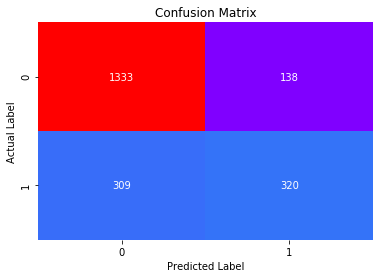

In [97]:
confusion_matrix(train_labels_rf,ytrain_predict_rf)
sns.heatmap(confusion_matrix(train_labels_rf,ytrain_predict_rf),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

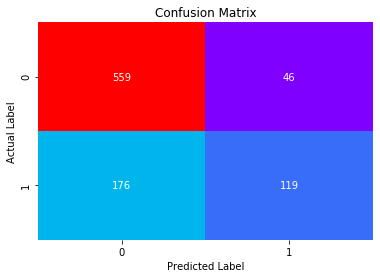

In [98]:
confusion_matrix(test_labels_rf,ytest_predict_rf)
sns.heatmap(confusion_matrix(test_labels_rf,ytest_predict_rf),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.831


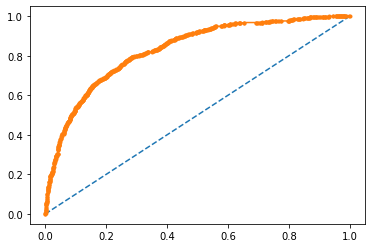

In [100]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_rf.predict_proba(X_train_rf)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels_rf, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels_rf, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.813


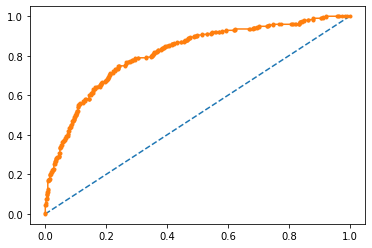

In [101]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_rf.predict_proba(X_test_rf)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels_rf, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels_rf, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [102]:
confusion_matrix(train_labels_dt, ytrain_predict_dt)

array([[1327,  144],
       [ 312,  317]], dtype=int64)

In [103]:
confusion_matrix(test_labels_dt, ytest_predict_dt)

array([[556,  49],
       [170, 125]], dtype=int64)

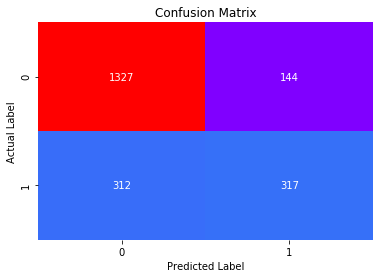

In [104]:
confusion_matrix(train_labels_dt,ytrain_predict_dt)
sns.heatmap(confusion_matrix(train_labels_dt,ytrain_predict_dt),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

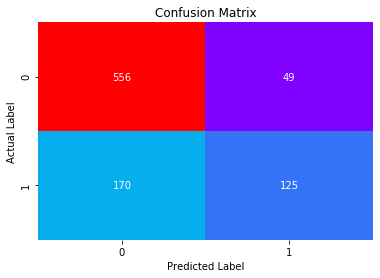

In [105]:
confusion_matrix(test_labels_dt,ytest_predict_dt)
sns.heatmap(confusion_matrix(test_labels_dt,ytest_predict_dt),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.825


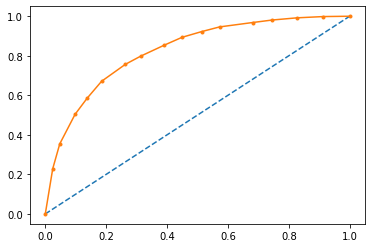

In [106]:
# predict probabilities
probs_dt = reg_dt_model.predict_proba(X_train_dt)
# keep probabilities for the positive outcome only
probs_dt = probs_dt[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(train_labels_dt, probs_dt)
print('AUC: %.3f' % auc_dt)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(train_labels_dt, probs_dt)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, marker='.')
# show the plot
plt.show()

AUC: 0.799


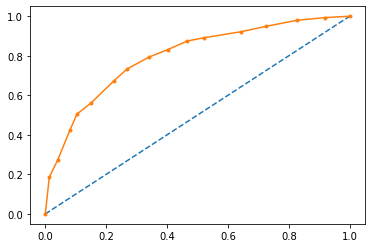

In [107]:
# predict probabilities
probs_dt = reg_dt_model.predict_proba(X_test_dt)
# keep probabilities for the positive outcome only
probs_dt = probs_dt[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(test_labels_dt, probs_dt)
print('AUC: %.3f' % auc_dt)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(test_labels_dt, probs_dt)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, marker='.')
# show the plot
plt.show()

In [108]:
confusion_matrix(train_labels_an, ytrain_predict_an)

array([[1262,  209],
       [ 225,  404]], dtype=int64)

In [109]:
confusion_matrix(test_labels_an, ytest_predict_an)

array([[533,  72],
       [138, 157]], dtype=int64)

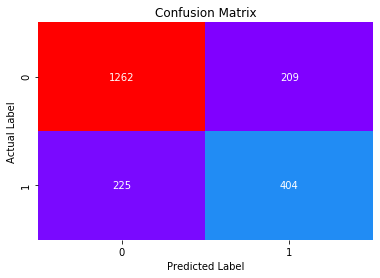

In [110]:
confusion_matrix(train_labels_an,ytrain_predict_an)
sns.heatmap(confusion_matrix(train_labels_an,ytrain_predict_an),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

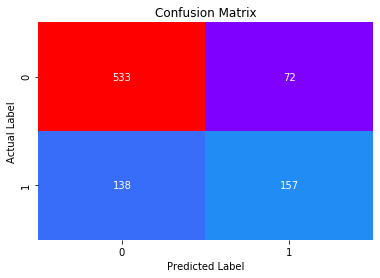

In [111]:
confusion_matrix(test_labels_an,ytest_predict_an)
sns.heatmap(confusion_matrix(test_labels_an,ytest_predict_an),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.843


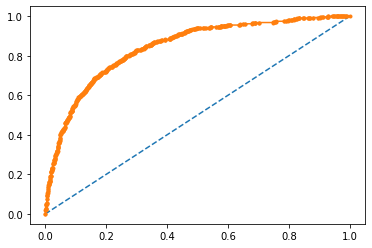

In [113]:
# AUC and ROC for the training data

# predict probabilities
probs_an = best_grid_an.predict_proba(X_train_an)
# keep probabilities for the positive outcome only
probs_an = probs_an[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_an = roc_auc_score(train_labels_an, probs_an)
print('AUC: %.3f' % auc_an)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_an, tpr_an, thresholds_an = roc_curve(train_labels_an, probs_an)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_an, tpr_an, marker='.')
# show the plot
plt.show()

AUC: 0.813


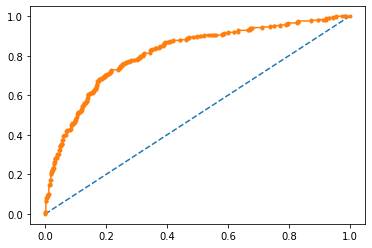

In [114]:
# predict probabilities
probs_an = best_grid_an.predict_proba(X_test_an)
# keep probabilities for the positive outcome only
probs_an = probs_an[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_an = roc_auc_score(test_labels_an, probs_an)
print('AUC: %.3f' % auc_an)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_an, tpr_an, thresholds_an = roc_curve(test_labels_an, probs_an)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_an, tpr_an, marker='.')
# show the plot
plt.show()